<a href="https://colab.research.google.com/github/Sumathi2007/Sumathi2007/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers.csv to Mall_Customers (1).csv
Dataset Loaded Successfully!
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

🔵 K-Means Silhouette Score: 0.553931997444648


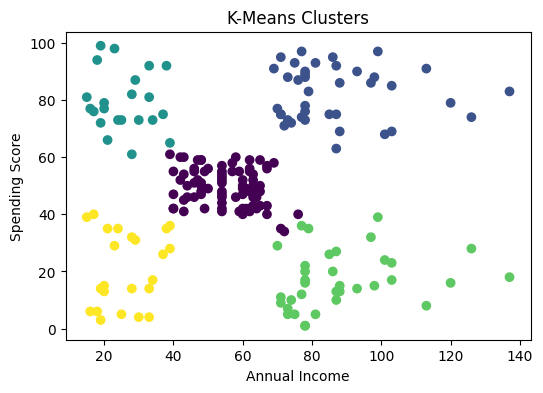


🔴 Hierarchical Clustering Silhouette Score: 0.5529945955148897


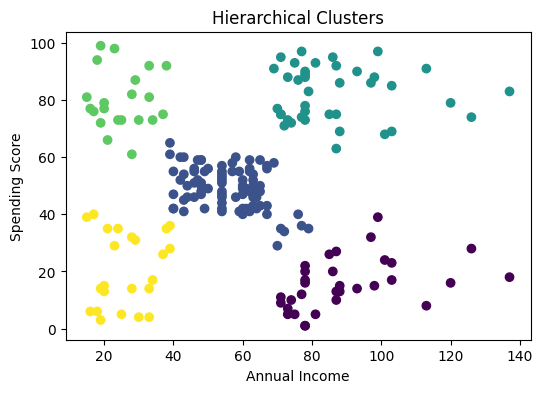


📊 MODEL COMPARISON TABLE
                     Model  Silhouette Score
0                  K-Means          0.553932
1  Hierarchical Clustering          0.552995

⭐ SUMMARY: K-Means performs better based on silhouette score.


In [3]:
# ============================================================
# ML MODEL COMPARISON: K-Means vs Hierarchical Clustering
# Dataset: Mall_Customers.csv
# ============================================================

# 1️⃣ Upload Dataset
from google.colab import files
uploaded = files.upload()

# 2️⃣ Import Libraries & Load Data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

df = pd.read_csv(list(uploaded.keys())[0])
print("Dataset Loaded Successfully!")
print(df.head())

# 3️⃣ Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# ============================================================
# 🔵 MODEL 1: K-MEANS CLUSTERING
# ============================================================
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)
kmeans_score = silhouette_score(X, df['KMeans_Cluster'])

print("\n🔵 K-Means Silhouette Score:", kmeans_score)

plt.figure(figsize=(6,4))
plt.scatter(
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=df['KMeans_Cluster']
)
plt.title("K-Means Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# ============================================================
# 🔴 MODEL 2: HIERARCHICAL CLUSTERING
# ============================================================
hc = AgglomerativeClustering(n_clusters=5)
df['Hierarchical_Cluster'] = hc.fit_predict(X)
hc_score = silhouette_score(X, df['Hierarchical_Cluster'])

print("\n🔴 Hierarchical Clustering Silhouette Score:", hc_score)

plt.figure(figsize=(6,4))
plt.scatter(
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=df['Hierarchical_Cluster']
)
plt.title("Hierarchical Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# ============================================================
# 📊 COMPARISON TABLE
# ============================================================
comparison = pd.DataFrame({
    "Model": ["K-Means", "Hierarchical Clustering"],
    "Silhouette Score": [kmeans_score, hc_score]
})

print("\n📊 MODEL COMPARISON TABLE")
print(comparison)

# ============================================================
# 📝 SUMMARY
# ============================================================
if kmeans_score > hc_score:
    print("\n⭐ SUMMARY: K-Means performs better based on silhouette score.")
else:
    print("\n⭐ SUMMARY: Hierarchical Clustering performs better based on silhouette score.")
